# MR2 ARA Supply Versus Market Rates


## Run this example in [Colab](https://colab.research.google.com/github/SignalOceanSdk/SignalSDK/tree/master/docs/examples/jupyter/Combined%20Examples/MR2_ARA_Supply_versus_Market_Rates.ipynb).


---
**APIs Used** : Tonnage List API, Market Rates API

---
**Description** :

In this Notebook the main goal is to construct and display the vessel count per day for MR2 tankers with respect to ARA area.

The script walks though the installation of the signal ocean SDK and import of the required dependencies used for the processing of the data.

 Also the parameters
```vessel_class_filter, load_port_filter, days_back, laycan_end_in_days, vessel_filter, route_description, start_date, end_date```
are initialized, in order to be used to achieve the desired output.

Next the Tonnage List API and the Market Rates API are called to fetch the corresponding data to our query based on the parameters set.

Lastly, we display the chart of the data that we retrieved and present them as time series.


---



**Output** : Time-Series Graph displaying the historic supply of MR2 Vessels in ARA region versus the corresponding Market Rates for the past year.

## Setup

In [ ]:
!pip install signal-ocean

Import required dependencies:

In [ ]:
from datetime import date, timedelta

import pandas as pd
import matplotlib.pyplot as plt

from signal_ocean import Connection
from signal_ocean.voyages import VoyagesAPI
from signal_ocean.market_rates import MarketRatesAPI, CargoId
from signal_ocean.tonnage_list import (
    TonnageListAPI,
    VesselClassFilter,
    PortFilter,
    VesselFilter,
    PushType,
    MarketDeployment,
    CommercialStatus,
    VesselSubclass,
    IndexLevel,
    DateRange,
)


## Parametrization

In [ ]:
signal_ocean_api_key = ""  # Replace with your subscription key
vessel_class_filter = VesselClassFilter(name_like="MR2") # Focus on the MR2 segment
load_port_filter = PortFilter(name_like="Rotterdam") # As a basis port for the Tonnage List Rotterdam is chosen
days_back = 365 # Last year info
laycan_end_in_days = 7 # Laycan day window

vessel_filter = VesselFilter(
    vessel_subclass=VesselSubclass.CLEAN, # Focusing on Clean carrying MR2s i.e. LR2
    latest_ais_since=5) # Filtering out vessels missing recent AIS info
'''
market_deployments=[MarketDeployment.RELET, MarketDeployment.SPOT], # Only Relevant for Tankers
push_types=[PushType.PUSHED_POSS, PushType.PUSHED], # Signal Ocean Platform UI filter: Pushed State
commercial_statuses= [CommercialStatus.ON_SUBS] #[CommercialStatus.AVAILABLE, CommercialStatus.ON_SUBS, CommercialStatus.FAILED, CommercialStatus.CANCELLED], # Signal Ocean Platform UI filter: Availability State
operational_statuses=[OperationalStatus.BALLAST_UNFIXED] #, OperationalStatus.BALLAST_FIXED], ## Signal Ocean Platform UI filter: Voyage State
'''


route_description = "MR2 - Cont/USAC" # Route Abbreviation for Market Rates retrieval later

today = date.today()
start_date = today - timedelta(days=days_back) # set start date for the Chart window
end_date = today - timedelta(1) # set  end date for the Chart window


Get your personal Signal Ocean API subscription key (acquired [here](https://apis.signalocean.com/profile)) and use it to create a `Connection`:

In [ ]:
connection = Connection(signal_ocean_api_key)

Create instances of APIs used throughout this notebook:

In [ ]:
tonnage_list_api = TonnageListAPI(connection)
market_rate_api = MarketRatesAPI(connection)

For more information, see the [Tonnage List](https://signaloceansdk.github.io/SignalSDK/tonnage_list/) and  [Market Rates](https://signaloceansdk.github.io/SignalSDK/market_rates/https://signaloceansdk.github.io/SignalSDK/market_rates/) API sections.



## Main CodeBlock

### Fetch the historical tonnage list

In [ ]:
load_port = tonnage_list_api.get_ports(load_port_filter)[0] # Retrieve load port ID
load_port

Port(id=3689, name='Rotterdam')

In [ ]:
vessel_class = tonnage_list_api.get_vessel_classes(vessel_class_filter)[0] # Retrieve vessel class object
load_port = tonnage_list_api.get_ports(load_port_filter)[0] # Retrieve load port object

htl = tonnage_list_api.get_historical_tonnage_list(
    loading_port = load_port,                       # load port of the requested Tonnage List
    vessel_class = vessel_class,                    # vessel class of interest
    laycan_end_in_days = laycan_end_in_days,        # laycan period
    date_range = DateRange(start_date, end_date),   # a range for which are the tonnage lists of interest
    vessel_filter = vessel_filter,                  # which vessels should be included in the response
)

htl_for_supply_trend = htl.to_data_frame()
htl_for_supply_trend


name vessel_class ice_class  \
date                      imo                                                 
2024-12-15 12:00:00+00:00 9447744            NH Erle          MR2       NaN   
                          9882396    Solar Katherine          MR2        1A   
                          9718870        Silver Heba          MR2       NaN   
                          9308132              Unite          MR2       NaN   
                          9364588               Jane          MR2       NaN   
...                                              ...          ...       ...   
2024-12-16 12:00:00+00:00 9789257    Atlantic Falcon          MR2       NaN   
                          9315068        Star Osprey          MR2       NaN   
                          9708760  Shenandoah Trader          MR2       NaN   
                          9345659           Papillon          MR2       NaN   
                          9344007           Hardrada          MR2       NaN   

                                   year_built  deadweight  length_overall  \
date                      imo                                               
2024-12-15 12:00:00+00:00 9447744        2010       49999          183.30   
                          9882396        2020       49990          183.00   
                          9718870        2016       49897          183.06   
                          9308132        2006       50322          189.02   
                          9364588        2008       51505          183.00   
...                                       ...         ...             ...   
2024-12-16 12:00:00+00:00 9789257        2018       49951          183.06   
                          9315068        2007       51213          183.00   
                          9708760        2015       50124          183.00   
                          9345659        2007       47302          182.50   
                          9344007        2007       45983          179.88   

                                   breadth_extreme subclass  \
date                      imo                                 
2024-12-15 12:00:00+00:00 9447744               32    Clean   
                          9882396               32    Clean   
                          9718870               32    Clean   
                          9308132               32    Clean   
                          9364588               32    Clean   
...                                            ...      ...   
2024-12-16 12:00:00+00:00 9789257               32    Clean   
                          9315068               32    Clean   
                          9708760               32    Clean   
                          9345659               32    Clean   
                          9344007               32    Clean   

                                  market_deployment_point_in_time  \
date                      imo                                       
2024-12-15 12:00:00+00:00 9447744                            Spot   
                          9882396                           Relet   
                          9718870                           Relet   
                          9308132                            Spot   
                          9364588                            Spot   
...                                                           ...   
2024-12-16 12:00:00+00:00 9789257                            Spot   
                          9315068                            Spot   
                          9708760                        Contract   
                          9345659                            Spot   
                          9344007                            Spot   

                                  push_type_point_in_time  ...  \
date                      imo                              ...   
2024-12-15 12:00:00+00:00 9447744                  Pushed  ...   
                          9882396                  Pushed  ...   
                          9718870   

### Get daily market rates for the route of interest


We'll need a helper function to find our desired route for the market rates:

In [ ]:
def return_selected_route(vessel_class, route_description):
    vessel_routes = market_rate_api.get_routes(vessel_class_id=vessel_class.id)
    for i, v in enumerate(vessel_routes):
        if vessel_routes[i].description == route_description:
            break
    return vessel_routes[i]


Which we can use to find the route object returned from the Market Rates API:

In [ ]:
market_rate_route = return_selected_route(vessel_class, route_description)
market_rate_route

Route(id='R27', description='MR2 - Cont/USAC', unit='WS', vessel_class_id=88, cargo_id=1, load_port_id=3688, discharge_port_id=3864, load_area_id=24758, discharge_area_id=24747, load_port_2_id=None, discharge_port_2_id=None, load_area_2_id=None, discharge_area_2_id=None, deprecated_to=None, deprecated_since=None)

And use it to query for market rates:

In [ ]:
market_rates = market_rate_api.get_market_rates(
    start_date = start_date,                          # Date from which we want the market rates for the specific route
    route_id = market_rate_route.id,                  # The ID of the route of interest
    vessel_class_id = vessel_class.id,                # The ID of the specific vessel class that we want the rates for
    end_date = end_date,                              # Last day of the time window that we want the rates for
    cargo_id = CargoId(market_rate_route.cargo_id)    # Cargo type that we want to concentrate to
)

market_rates = pd.DataFrame([vars(vr) for vr in market_rates])
market_rates["rate_date"] = pd.to_datetime(market_rates["rate_date"])
market_rates.set_index("rate_date", inplace=True)
market_rates


,route_id,rate_value,unit,vessel_class_id,deprecated_to
rate_date,,,,,
2023-12-17,R27,195.0,WS,88,None
2023-12-18,R27,195.0,WS,88,None
2023-12-19,R27,180.0,WS,88,None
2023-12-20,R27,175.0,WS,88,None
2023-12-21,R27,180.0,WS,88,None
...,...,...,...,...,...
2024-12-12,R27,145.0,WS,88,None
2024-12-13,R27,140.0,WS,88,None
2024-12-14,R27,140.0,WS,88,None


### Plot the daily supply trend with market rates

In [ ]:
def plot_drawing():
  fig, axs = plt.subplots(figsize=(15, 6))

  supply_trend = htl_for_supply_trend.groupby(IndexLevel.DATE, sort=True).size()
  supply_trend.index = supply_trend.index.strftime("%d %b %y")

  # Left axis (Supply plot)
  supply_plot = supply_trend.plot(ax=axs, x="date", color="#3086EF", marker="o")
  supply_plot.set_ylabel(
      "Vessel count", color=plt.gca().lines[-1].get_color(), fontsize=14
  )
  supply_plot.set_ylim(ymin=0)

  # Right axis (Market rate plot)
  market_rates.index = market_rates.index.strftime("%d %b %y")
  mr_plot = market_rates.plot(
      ax=axs, y="rate_value", secondary_y=True, color="#F06C6E", marker="d"
  )
  mr_plot.set_ylabel(
      "Market Rates (WS)", color=plt.gca().lines[-1].get_color(), fontsize=14
  )

  axs.set_xlim(0, len(supply_trend) - 1)
  axs.set_xlabel("")
  axs.get_legend().remove()


## Output

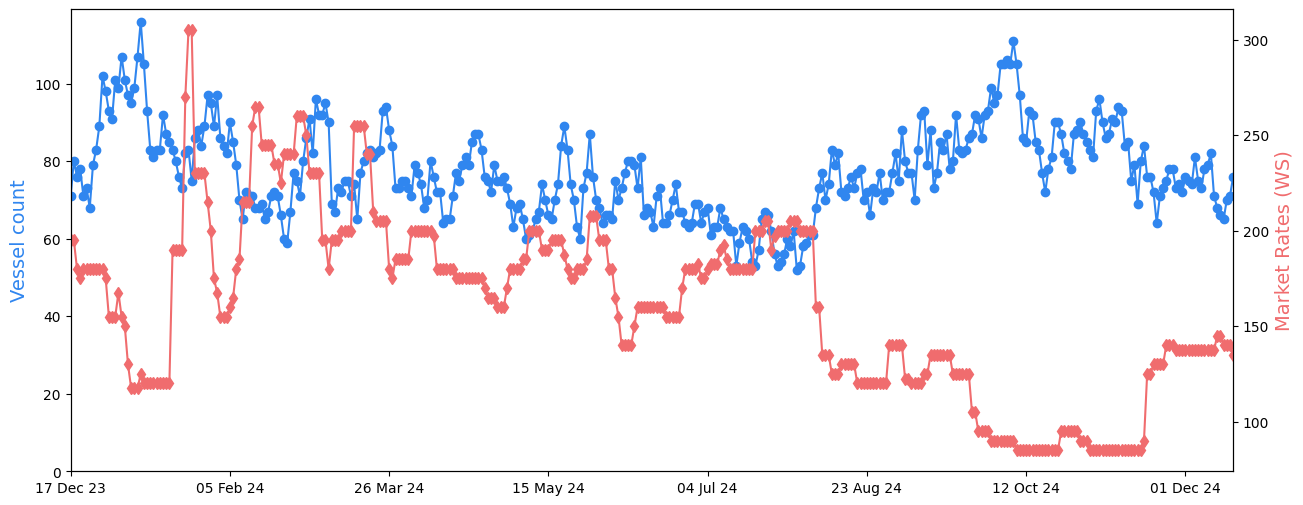

In [ ]:
plot_drawing()